In [2]:
import pandas as pd

#Retrieve All data

In [3]:
url = "https://publicapi.traffy.in.th/share/teamchadchart/search?limit=100&offset=0"
df = pd.read_csv('https://publicapi.traffy.in.th/dump-csv-chadchart/bangkok_traffy.csv')

In [4]:
df.columns

Index(['ticket_id', 'type', 'organization', 'comment', 'photo', 'photo_after',
       'coords', 'address', 'subdistrict', 'district', 'province', 'timestamp',
       'state', 'star', 'count_reopen', 'last_activity'],
      dtype='object')

In [5]:
df.head()

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
0,2021-9LHDM6,{},NaN,ไม่มีภาพ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.48661,13.79386",1867 จรัญสนิทวงศ์ แขวง บางพลัด เขตบางพลัด กรุง...,บางพลัด,บางพลัด,กรุงเทพมหานคร,2021-09-01 10:44:55.353209+00,กำลังดำเนินการ,NaN,NaN,2022-02-22 04:59:58.622268+00
1,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,NaN,NaN,2022-06-04 15:34:14.609206+00
2,2021-8GKAR9,{สายไฟ},ยังไม่มีหน่วยงานรับผิดชอบ,1. เถาวัลย์งอดบนสายไฟ ผมกลัวว่าต่อไปจะเอาออกยา...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.57685,13.79704",335/31 ลาดพร้าว แขวง สามเสนนอก เขตห้วยขวาง กรุ...,สามเสนนอก,ห้วยขวาง,จังหวัดกรุงเทพมหานคร,2021-09-19 06:47:50.488685+00,กำลังดำเนินการ,NaN,NaN,2022-02-22 04:30:07.293416+00
3,2021-AFPUXZ,"{ถนน,สะพาน}",NaN,1 ซ่อมทางเท้าหลังคืนพื้นที่จากการปรับปรุงสะพาน...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.52916,13.72338",37 10 ซอย สีลม 9 แขวง สีลม เขตบางรัก กรุงเทพมห...,สีลม,บางรัก,กรุงเทพมหานคร,2021-09-19 07:40:30.000781+00,กำลังดำเนินการ,NaN,NaN,2022-02-22 04:30:04.507406+00
4,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.66709,13.67891",189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,4.0,NaN,2022-06-21 08:21:09.532782+00


In [6]:
type_filter_df = df[(df['type'].str.contains('กีดขวาง', na=False) | df['type'].str.contains('ป้าย', na=False)) & ~df['timestamp'].str.contains('2021', na=False)] 

In [7]:
type_filter_df = type_filter_df.sort_values('timestamp', ascending=False)

In [8]:
print(type_filter_df.shape)

(21885, 16)


In [9]:
import os

In [10]:
if not os.path.isdir("raw_data"):
  os.makedirs('raw_data')
  os.makedirs('raw_data/1')
  os.makedirs('raw_data/2')
  os.makedirs('raw_data/3')
  os.makedirs('raw_data/4')

In [33]:
tickets = {}
dir_count = 1

In [34]:
df.loc[0][4]

'https://storage.googleapis.com/traffy_public_bucket/attachment/2021-09/ba04e344d8011ae51fdcf6db72de76780575d10c.jpg'

In [35]:
import requests
from PIL import Image
from io import BytesIO

# URL of the image you want to load
image_url = df.loc[0][4]

# Send a GET request to fetch the image
response = requests.get(image_url)

# Load the content of the response as an image
image = Image.open(BytesIO(response.content))

# Save the image to a local folder
local_path = "test.jpg"  # Replace with the desired local path
image.save(local_path)

# Confirm the image has been saved
print("Image saved to:", local_path)


Image saved to: test.jpg


In [36]:
print(len(tickets))

0


In [37]:
cnt = 0
for problem in type_filter_df.loc[:, ["ticket_id","photo"]].itertuples(index=False):
  if problem.ticket_id in tickets:
    continue;
  if  cnt %1000== 0 and cnt!=0:
    dir_count += 1
  if dir_count == 5:
    break
  tickets[problem.ticket_id] = True
  photo_url = problem.photo
  cnt+=1
  response = requests.get(photo_url)
  image = Image.open(BytesIO(response.content)).convert('RGB')
  path = 'raw_data/{}/{}'.format(dir_count, photo_url.split('/')[-1])
#   print(path)
  image.save(path)
#   break

In [ ]:
!zip -r raw_data.zip raw_data 

Streaming output truncated to the last 5000 lines.
  adding: raw_data/2/1672647267310.jpeg (deflated 3%)
  adding: raw_data/2/669efe33a24ac5deda5417ce24ac54bca3f65a9a.jpg (deflated 0%)
  adding: raw_data/2/e4b65ed27266359901b91c30fb334d421af7a31e.jpg (deflated 0%)
  adding: raw_data/2/03630dd0ba7eb329aff575d23963a162ca7bf7b6.jpg (deflated 0%)
  adding: raw_data/2/748344e28f44af8addda303c7cc98818b3b3abfa.jpg (deflated 1%)
  adding: raw_data/2/1675282008695.jpeg (deflated 3%)
  adding: raw_data/2/4d2fc8ca900a0ee59ba4b0f5405011e4acccd822.jpg (deflated 0%)
  adding: raw_data/2/8ca37738dfab13127eca320749a6b0a9d79535d2.jpg (deflated 0%)
  adding: raw_data/2/d64a4f274d122966523d441214b772ff7c2f285f.jpg (deflated 0%)
  adding: raw_data/2/5682fdcd4797e7cb0b7ec5b35db72a07684410e2.jpg (deflated 4%)
  adding: raw_data/2/1673239301089.jpeg (deflated 3%)
  adding: raw_data/2/1675226162074.jpeg (deflated 3%)
  adding: raw_data/2/370be4f732486cc914901453b02f64eb98757b16.jpg (deflated 0%)
  adding: raw

In [16]:
import shutil
import os
import pandas as pd

In [22]:
fnames = os.listdir('data/label')
fnames = [fname[:-4] for fname in fnames][1:]
# Convert list to DataFrame
df = pd.DataFrame(fnames, columns=['Filename'])

# Save DataFrame to CSV
df.to_csv('data_list.csv', index=False)

In [21]:
cnt = 0
for fname in fnames:
    found = False
    for i in range(1, 5):
        if found:
            break
        all_dir = os.listdir('raw_data/{}'.format(i))
        for dir in all_dir:
            cmp_dir = dir.split('.')[0]
            if cmp_dir == fname:
                found=True
                cnt += 1
                source = "raw_data/{}/{}".format(i, dir)
                dest = "data/img"
#                 print(source, dest)
                shutil.move(source, dest)
                break
    if found==False:
        print('this file do not exist: {}'.format(fname))
print(cnt)

this file do not exist: .ipynb_checkpo
685


In [ ]:
import requests

In [ ]:
res = requests.get(url)

In [ ]:
fname = res.json()['results'][0]['photo_url']

In [ ]:
from google.colab import files as FILE

In [ ]:
fname

'https://storage.googleapis.com/traffy_public_bucket/attachment/2023-04/aeab6e9be1fdf221dcb4373b9069d930dfab4241.jpg'

In [ ]:
!wget https://storage.googleapis.com/traffy_public_bucket/attachment/2023-04/9f0b180c9248825f55fd5e5cee40649e9222381b.jpg

--2023-04-23 10:45:35--  https://storage.googleapis.com/traffy_public_bucket/attachment/2023-04/9f0b180c9248825f55fd5e5cee40649e9222381b.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 627962 (613K) [image/jpeg]
Saving to: ‘9f0b180c9248825f55fd5e5cee40649e9222381b.jpg.1’

9f0b180c9248825f55f 100%[===================>] 613.24K  2.33MB/s    in 0.3s    

2023-04-23 10:45:35 (2.33 MB/s) - ‘9f0b180c9248825f55fd5e5cee40649e9222381b.jpg.1’ saved [627962/627962]



In [ ]:
import os

In [ ]:
if not os.path.isdir("raw_data"):
  os.makedirs('raw_data')

In [ ]:
cnt = 0
for result in res.json()['results']:
  photo_url = result['photo_url']
  if result['type'] and ("กีดขวาง" in result['type'].split(',') or "ป้าย" in result['type'].split(',')):
    !wget --directory-prefix=/content/raw_data {photo_url}
    cnt+=1
print(cnt)

--2023-04-23 10:47:05--  https://storage.googleapis.com/traffy_public_bucket/attachment/2023-04/40c00a3ee72ca9375f6bc2163532e355dbfc0b6b.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 475058 (464K) [image/jpeg]
Saving to: ‘/content/raw_data/40c00a3ee72ca9375f6bc2163532e355dbfc0b6b.jpg’

40c00a3ee72ca9375f6 100%[===================>] 463.92K  2.16MB/s    in 0.2s    

2023-04-23 10:47:06 (2.16 MB/s) - ‘/content/raw_data/40c00a3ee72ca9375f6bc2163532e355dbfc0b6b.jpg’ saved [475058/475058]

--2023-04-23 10:47:06--  https://storage.googleapis.com/traffy_public_bucket/attachment/2023-04/bb2f53e422b7c1e897d86367d360ff33d3ffce4b.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com 

In [ ]:
!pip install -q transformers
!pip install -q timm

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

url = "/content/raw_data/279a55f6c09ca47473c2dc0568b951170bf4d2e1.jpg"
image = Image.open(url)

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-101")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-101")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected bus with confidence 0.986 at location [384.51, 677.95, 475.43, 713.91]
Detected person with confidence 0.996 at location [966.13, 682.12, 1032.07, 841.22]
Detected person with confidence 0.997 at location [857.48, 698.04, 885.72, 770.33]
Detected car with confidence 0.998 at location [523.54, 706.9, 617.37, 767.6]


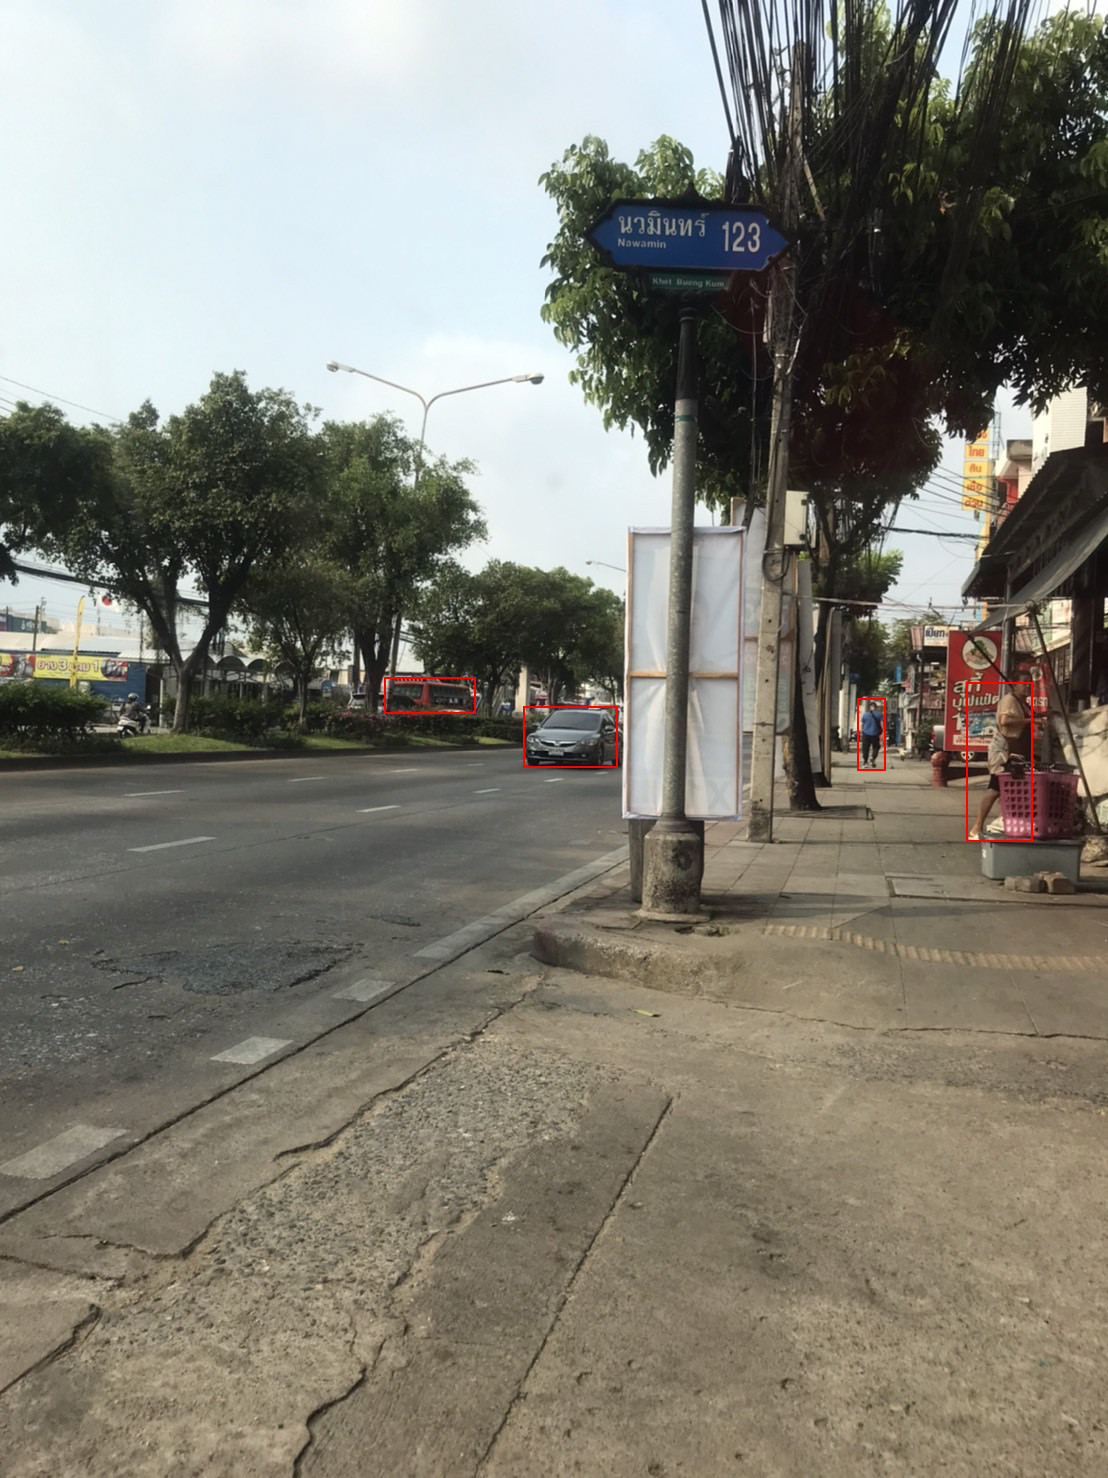

In [ ]:
from PIL import ImageDraw

def draw_bounding_boxes(image, boxes):
    # Create a drawing object
    draw = ImageDraw.Draw(image)
    boxes_list = [(box[0], box[1], box[2], box[3]) for box in boxes]
    # Loop over each bounding box and draw it on the image
    for box in boxes_list:
        draw.rectangle(box, outline='red', width=2)

    # Return the resulting image
    return image
# print(results["boxes"].numpy())
result_image = draw_bounding_boxes(image, results["boxes"])
result_image.show()